▼ tips データの先頭
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

▼ describe()
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


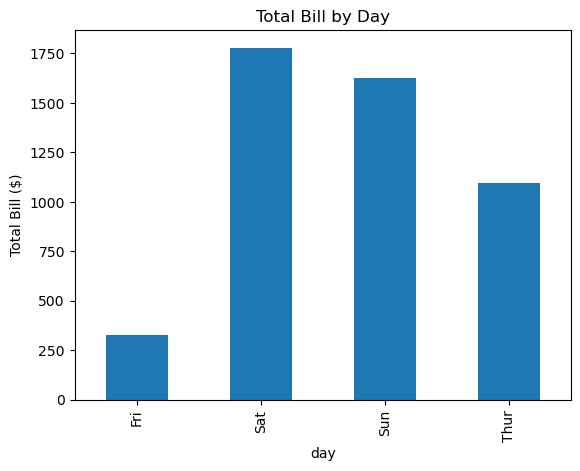

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub から直接 CSV を読み込む
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# データの先頭 5 行を表示
print("▼ tips データの先頭")
print(df.head())

# 基本統計量
print("\n▼ describe()")
print(df.describe())

# 曜日別の合計請求額を棒グラフ化
day_sum = df.groupby("day")["total_bill"].sum()
day_sum.plot.bar()
plt.title("Total Bill by Day")
plt.ylabel("Total Bill ($)")
plt.show()


▼ AAPL 日次株価 先頭5行
               Open     High      Low    Close     Volume
Date                                                     
2020-01-02  71.7196  72.7764  71.4646  72.7161  140071218
2020-01-03  71.9425  72.7725  71.7839  72.0115  151314357
2020-01-06  71.1246  72.6207  70.8782  72.5811  122445682
2020-01-07  72.5909  72.8502  72.0233  72.2432  115147229
2020-01-08  71.9444  73.7056  71.9425  73.4042  136680453

▼ describe()
              Open         High          Low        Close        Volume
count  1331.000000  1331.000000  1331.000000  1331.000000  1.331000e+03
mean    156.043461   157.833398   154.403222   156.205043  9.051368e+07
std      44.316124    44.619970    44.040292    44.366064  5.434468e+07
min      55.347500    55.451100    51.596800    54.450700  2.326025e+07
25%     128.470000   129.821000   126.833000   128.486500  5.456661e+07
50%     154.051000   156.003000   151.928000   154.270000  7.600418e+07
75%     182.652000   184.494000   180.943000   182.888500  

C:\Users\mahyy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12316 (\N{WAVE DASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


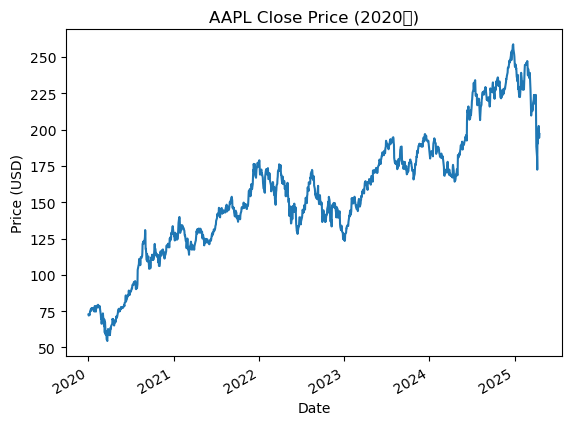

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ① Stooq の公開 CSV（AAPL 日次株価）
#    期間は 2020-01-01 〜 今日
url = (
    "https://stooq.com/q/d/l/?"
    "s=AAPL.US&"        # 銘柄：AAPL（US市場）
    "d1=20200101&"      # 開始日：2020-01-01
    "d2=20250420&"      # 終了日：今日は 2025-04-20
    "i=d"               # 日次データ
)

# ② CSV 読み込み（Date 列を日付型にして index に）
df_stock = pd.read_csv(
    url,
    parse_dates=["Date"],
    index_col="Date"
)

# ③ データの先頭と統計量を表示
print("▼ AAPL 日次株価 先頭5行")
print(df_stock.head())
print("\n▼ describe()")
print(df_stock.describe())

# ④ 終値 (Close) の時系列を折れ線グラフで表示
df_stock["Close"].plot(title="AAPL Close Price (2020〜)")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.show()


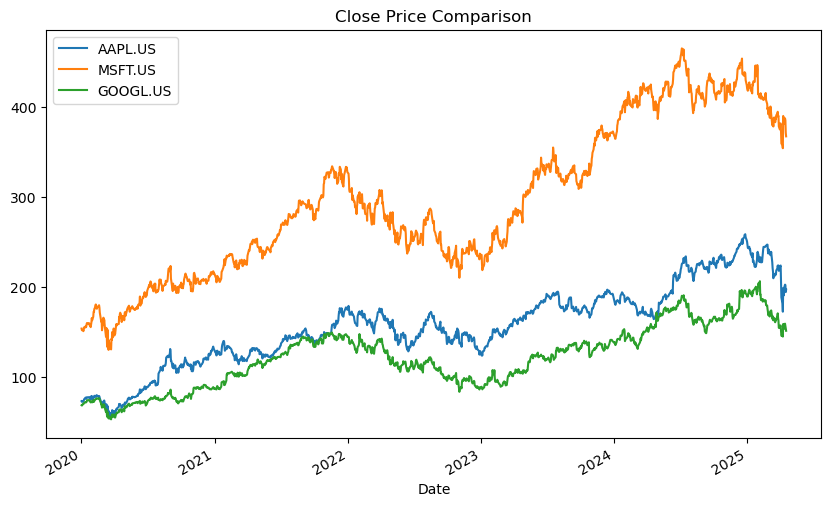

In [7]:
symbols = ["AAPL.US", "MSFT.US", "GOOGL.US"]
dfs = {
    sym: pd.read_csv(
        f"https://stooq.com/q/d/l/?s={sym}&d1=20200101&d2=20250420&i=d",
        parse_dates=["Date"], index_col="Date"
    )["Close"]
    for sym in symbols
}
pd.DataFrame(dfs).plot(figsize=(10,6))
plt.title("Close Price Comparison")
plt.show()
